# PCA: PRINCIPAL COMPONENT ANALYSIS

**File:** PCA.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# IMPORT LIBRARIES

In [1]:
import pandas as pd                    # For dataframes
import matplotlib.pyplot as plt        # For plotting data
import seaborn as sns                  # For plotting data
from sklearn.decomposition import PCA  # For PCA

# LOAD AND PREPARE DATA

Load the training data `trn` and testing data `tst` from the CSV files in the data directory.
Separate the data matrix from the class variable.

In [2]:
# Imports the training data
trn = pd.read_csv('data/optdigits_trn.csv')

# Separates the attributes P0-P63 into X_trn
X_trn = trn.filter(regex='\d')

# Separates the class variable into y_trn
y_trn = trn.y

# Imports the testing data
tst = pd.read_csv('data/optdigits_tst.csv')

# Separates the attributes P0-P63 into X_tst
X_tst = tst.filter(regex='\d')

# Separates the class variable into y_tst
y_tst = tst.y

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ZOKBUCHN\AppData\Local\Temp\ipykernel_25612\1431440449.py:5: SyntaxWarning: invalid escape sequence '\d'
  X_trn = trn.filter(regex='\d')
C:\Users\ZOKBUCHN\AppData\Local\Temp\ipykernel_25612\1431440449.py:14: SyntaxWarning: invalid escape sequence '\d'
  X_tst = tst.filter(regex='\d')


In [3]:
# Shows the first few rows of the training data
trn.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
0,0,0,0,16,6,0,0,0,0,0,...,0,0,0,0,10,13,0,0,0,1
1,0,0,4,16,14,0,0,0,0,0,...,0,0,0,6,16,16,16,4,0,1
2,0,0,12,10,0,0,0,0,0,3,...,3,0,0,9,16,16,16,16,9,1
3,0,0,0,6,16,3,0,0,0,0,...,0,0,0,1,8,12,15,13,1,6
4,0,0,11,12,7,0,0,0,0,0,...,0,0,0,8,10,8,0,0,0,1


# PRINCIPAL COMPONENT ANALYSIS: TRAIN MODEL

In the training phase, we'll do the following:

1. Set up the PCA object
1. Project the training data onto the principal directions found by PCA
1. Plot the ratio of variances explained by each direction
1. Create a scatter plot of projected training data along the first two principal directions
1. Get the average log-likelihood score of all samples

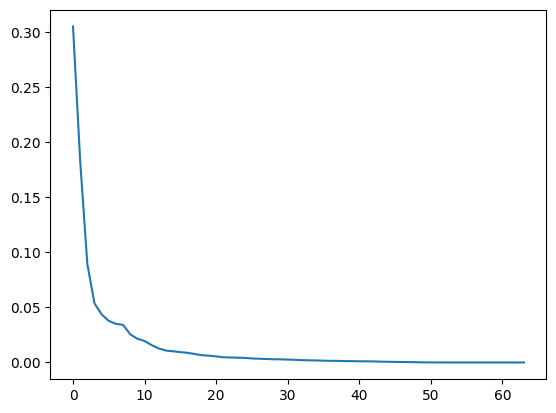

In [4]:
# Sets up the PCA object
pca = PCA()

# Transforms the training data ('tf' = 'transformed')
trn_tf = pca.fit_transform(X_trn)

# Plot the variance explained by each component
plt.plot(pca.explained_variance_ratio_)

<Axes: >

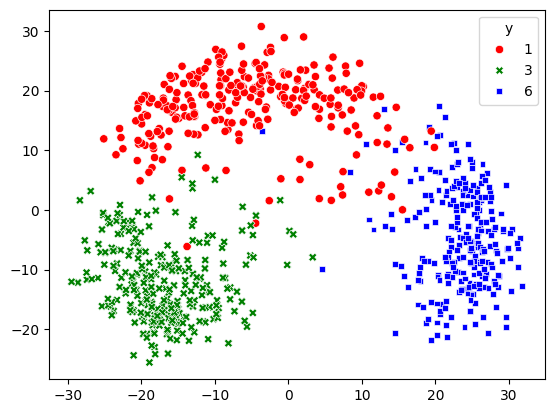

In [5]:
# Plots the projected data set on the first two principal components and colors by class
sns.scatterplot(
    x=trn_tf[:, 0], 
    y=trn_tf[:, 1],
    style=y_trn,
    hue=y_trn,
    palette=['red', 'green', 'blue'])

In [6]:
# Gets the average log likelihood score of training data (with two decimal places)
print("%.2f" % pca.score(X_trn))

189.21


# TEST MODEL

This phase takes the PCA model developed above and does the following:

1. Transforms the test data on the learned PCA directions
1. Creates a scatter plot along the first two principal directions
1. Finds the average log likelihood score of all test points


<Axes: >

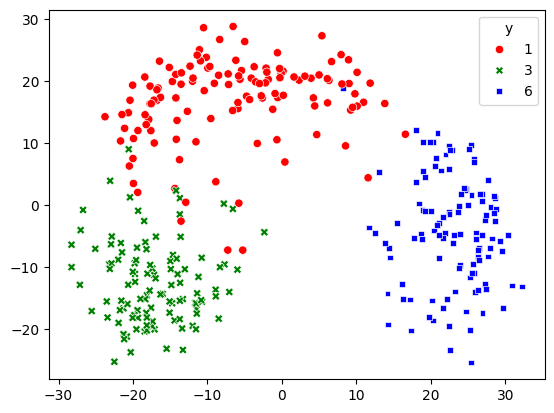

In [7]:
# Transforms the test data
tst_tf = pca.transform(X_tst)

# Make a scatter plot along the first two principal directions
# You can see how well the digits are separated on the test set
sns.scatterplot(
    x=tst_tf[:, 0],
    y=tst_tf[:, 1],
    style=y_tst,
    hue=y_tst,
    palette=['red', 'green', 'blue'])

In [8]:
# Gets the average log likelihood score of testing data to compare with the
# training data (again with two decimal places)
print("%.2f" % pca.score(X_tst))

184.31
